In [30]:
import pandas as pd
import matplotlib
import sys
# print(sys.argv[1])
df = pd.read_csv('threads_std_high_thread_1.csv') 

COMMIT_ALG             ONE_PC     TWO_PC
NUM_SERVER_THREADS                      
2                    44.36254   27.16294
4                    87.84410   55.56130
8                   154.56860  100.99630
16                  300.71360  193.98000
32                  591.39600  364.10780
64                  952.13680  653.62140
128                 522.64460  368.87000


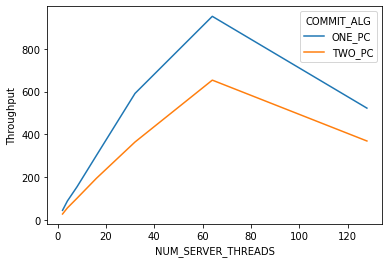

In [31]:
grouped = df.groupby(['COMMIT_ALG', 'NUM_SERVER_THREADS'])
newdf = grouped['Throughput'].mean().reset_index()
newdf = newdf.pivot(index='NUM_SERVER_THREADS', columns='COMMIT_ALG', values='Throughput')
print(newdf)
plot = newdf.plot()
plot.set_ylabel("Throughput")
fig = plot.get_figure()
fig.savefig("threads_zipf0_std_high.png")


In [28]:
latency = grouped['execute_phase (in us)', 'prepare_phase (in us)', 'commit_phase (in us)', 'abort (in us)'].mean().reset_index()
result = latency[latency['NUM_SERVER_THREADS'] == 16]

<ipython-input-28-f52b7dcd3b27>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  latency = grouped['execute_phase (in us)', 'prepare_phase (in us)', 'commit_phase (in us)', 'abort (in us)'].mean().reset_index()


  COMMIT_ALG  NUM_SERVER_THREADS  execute_phase (in us)  \
3     ONE_PC                  16                269.452   
8     TWO_PC                  16                227.181   

   prepare_phase (in us)  commit_phase (in us)  abort (in us)  
3               38632.84              1.398768              0  
8               36273.12          27925.780000              0  


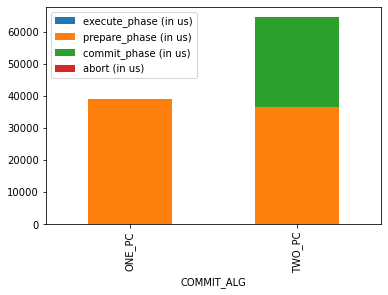

In [29]:
print(result)
result = result.drop(['NUM_SERVER_THREADS'], axis=1)
latency_plot = result.plot.bar(stacked='True', x='COMMIT_ALG')
fig = latency_plot.get_figure()
fig.savefig("latency_zipf09_std.png")